In [9]:
import torch
from torch import nn
from torch.utils.data import TensorDataset,DataLoader
from torchvision import datasets
import torch.optim as optim
import torch.utils.data as df
from torchvision.transforms import ToTensor
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import datetime as dt
torch.manual_seed(0)

In [10]:
data = pd.read_csv(r"D:\Data Science\datasets\yahoo_data.csv")
data['Date']=pd.to_datetime(data['Date'])
#data['Date_val'] = data['Date'].map(dt.datetime.toordinal)
data.drop('Unnamed: 0',inplace=True,axis=1)
data.head()

Date      Open      High       Low    Close*  Adj Close**       Volume
0 2023-04-28  33797.43  34104.56  33728.40  34098.16     34098.16  354310000.0
1 2023-04-27  33381.66  33859.75  33374.65  33826.16     33826.16  343240000.0
2 2023-04-26  33596.34  33645.83  33235.85  33301.87     33301.87  321170000.0
3 2023-04-25  33828.34  33875.49  33525.39  33530.83     33530.83  297880000.0
4 2023-04-24  33805.04  33891.15  33726.09  33875.40     33875.40  252020000.0

In [11]:
dataset_summary = pd.DataFrame({"Date" : "The date on which trade occured", "Open" : "Day's Opening trading price", "High" : "Day's highest trading price",
                   "Low" : "Day's lowest trading price", "Close*" : "Day's Closing trading price", "Adj Close**" : "Day's Closing trading price after adjustustments",
                   "Volume" : "Quantity of stocks sold between open and close"},index=["Description"])
display(pd.DataFrame.transpose(dataset_summary))

Description
Date                          The date on which trade occured
Open                              Day's Opening trading price
High                              Day's highest trading price
Low                                Day's lowest trading price
Close*                            Day's Closing trading price
Adj Close**  Day's Closing trading price after adjustustments
Volume         Quantity of stocks sold between open and close

In [12]:
# #sns.heatmap(data.corr(),annot=True)
# fig = plt.figure(figsize=(15,10))

# for i in range(1,len(data.columns)):    
#     plt.subplot(3,2,i)
#     plt.scatter(data['Date'],data[data.columns[i]])
#     plt.xlabel('Date')
#     plt.ylabel(data.columns[i])
# plt.show()

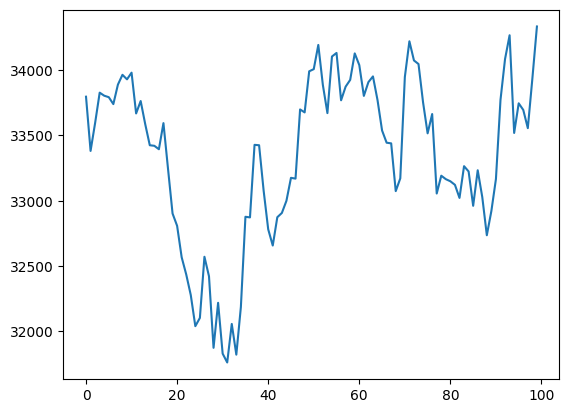

In [13]:
torch.manual_seed(0)
open_price = data[['Open']].values.astype('float32')[:100]
plt.plot(open_price)

In [14]:
torch.manual_seed(0)
train_size = round(len(open_price)*0.67)
test_size = len(open_price) - train_size
train, test = open_price[:train_size], open_price[train_size:]

def create_dataset(dataset, lookback):
    X, y = [], []

    for i in range(len(dataset)-lookback):
        features = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(features)
        y.append(target)
    
    return torch.tensor(X), torch.tensor(y)


lookback = 1
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([66, 1, 1]) torch.Size([66, 1, 1])
torch.Size([32, 1, 1]) torch.Size([32, 1, 1])


In [17]:
torch.manual_seed(0)
class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        nn.LSTM(input_size=1, hidden_size=50, num_layers=lookback, batch_first=True)
        nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x = self.linear(x)
        return x

In [18]:
torch.manual_seed(0)
model = AirModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = df.DataLoader(df.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)
 
n_epochs = 100
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        # print(y_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        #print("before",y_pred)
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
        # print("after",y_pred)
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))


ValueError: optimizer got an empty parameter list

In [ ]:
for i in model.parameters():
    print(i)

tensor([[6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6.6000],
        [6

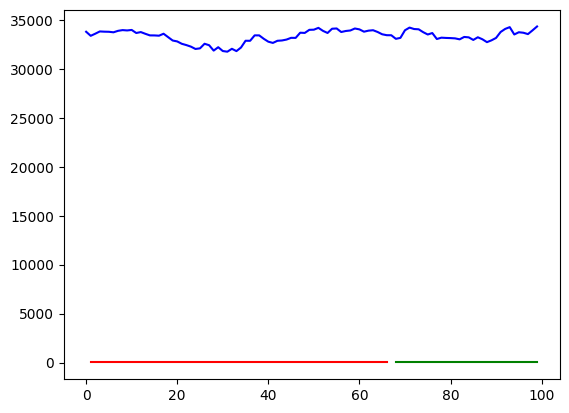

Parameter containing:
tensor([[-0.0011],
        [ 0.0759],
        [-0.1164],
        [-0.1041],
        [-0.0545],
        [ 0.0379],
        [-0.0028],
        [ 0.1121],
        [-0.0126],
        [ 0.0374],
        [-0.0427],
        [-0.0278],
        [-0.1351],
        [-0.0937],
        [-0.0583],
        [ 0.0052],
        [ 0.0559],
        [ 0.0849],
        [-0.0959],
        [-0.0616],
        [ 0.0514],
        [ 0.1174],
        [-0.0291],
        [ 0.1058],
        [-0.0228],
        [ 0.0150],
        [ 0.1281],
        [-0.1312],
        [-0.0890],
        [-0.0358],
        [-0.0551],
        [ 0.1222],
        [-0.0917],
        [-0.0651],
        [-0.0988],
        [-0.1324],
        [-0.0826],
        [ 0.1216],
        [ 0.0631],
        [ 0.0685],
        [ 0.0074],
        [-0.0725],
        [ 0.0239],
        [-0.1320],
        [-0.1022],
        [-0.0729],
        [ 0.0892],
        [ 0.0829],
        [-0.0627],
        [-0.0051],
        [ 0.0904],
        [

In [ ]:
torch.manual_seed(0)
with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(open_price) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred[:, -1, :]
    print(y_pred)
    train_plot[lookback:train_size] = model(X_train)[:, -1, :]
    # shift test predictions for plotting
    test_plot = np.ones_like(open_price) * np.nan
    test_plot[train_size+lookback:len(open_price)] = model(X_test)[:, -1, :]
# plot
plt.plot(open_price, c='b')
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')
print(test_plot[75:])
plt.show()
for i in model.parameters():
    print(i)

In [ ]:
X_train.shape

torch.Size([66, 1, 1])

In [ ]:
y_train.shape

torch.Size([66, 1, 1])

In [ ]:
X_test

tensor([[[33439.5586],
         [33073.4609],
         [33171.3516],
         [33948.4883]],

        [[33073.4609],
         [33171.3516],
         [33948.4883],
         [34222.3203]],

        [[33171.3516],
         [33948.4883],
         [34222.3203],
         [34075.3086]],

        [[33948.4883],
         [34222.3203],
         [34075.3086],
         [34047.8594]],

        [[34222.3203],
         [34075.3086],
         [34047.8594],
         [33754.0312]],

        [[34075.3086],
         [34047.8594],
         [33754.0312],
         [33516.4297]],

        [[34047.8594],
         [33754.0312],
         [33516.4297],
         [33664.3906]],

        [[33754.0312],
         [33516.4297],
         [33664.3906],
         [33055.3008]],

        [[33516.4297],
         [33664.3906],
         [33055.3008],
         [33191.7188]],

        [[33664.3906],
         [33055.3008],
         [33191.7188],
         [33165.1406]],

        [[33055.3008],
         [33191.7188],
         [3316

In [ ]:
pred = model(X_test)
pred.shape

torch.Size([32, 1, 1])

In [ ]:
pred

tensor([[[6.6000]],

        [[6.6000]],

        [[6.6000]],

        [[6.6000]],

        [[6.6000]],

        [[6.6000]],

        [[6.6000]],

        [[6.6000]],

        [[6.6000]],

        [[6.6000]],

        [[6.6000]],

        [[6.6000]],

        [[6.6000]],

        [[6.6000]],

        [[6.6000]],

        [[6.6000]],

        [[6.6000]],

        [[6.6000]],

        [[6.6000]],

        [[6.6000]],

        [[6.6000]],

        [[6.6000]],

        [[6.6000]],

        [[6.6000]],

        [[6.6000]],

        [[6.6000]],

        [[6.6000]],

        [[6.6000]],

        [[6.6000]],

        [[6.6000]],

        [[6.6000]],

        [[6.6000]]], grad_fn=<ViewBackward0>)

In [ ]:
params = []
for i in model.parameters():
    params.append(i)
    print(i)
weight, bias = params[0], params[1]

Parameter containing:
tensor([[-0.0011],
        [ 0.0759],
        [-0.1164],
        [-0.1041],
        [-0.0545],
        [ 0.0379],
        [-0.0028],
        [ 0.1121],
        [-0.0126],
        [ 0.0374],
        [-0.0427],
        [-0.0278],
        [-0.1351],
        [-0.0937],
        [-0.0583],
        [ 0.0052],
        [ 0.0559],
        [ 0.0849],
        [-0.0959],
        [-0.0616],
        [ 0.0514],
        [ 0.1174],
        [-0.0291],
        [ 0.1058],
        [-0.0228],
        [ 0.0150],
        [ 0.1281],
        [-0.1312],
        [-0.0890],
        [-0.0358],
        [-0.0551],
        [ 0.1222],
        [-0.0917],
        [-0.0651],
        [-0.0988],
        [-0.1324],
        [-0.0826],
        [ 0.1216],
        [ 0.0631],
        [ 0.0685],
        [ 0.0074],
        [-0.0725],
        [ 0.0239],
        [-0.1320],
        [-0.1022],
        [-0.0729],
        [ 0.0892],
        [ 0.0829],
        [-0.0627],
        [-0.0051],
        [ 0.0904],
        [

In [ ]:
model.eval()

AirModel(
  (lstm): LSTM(1, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)